# 순환신경망 (Recurrent Neural Network)


<p> &nbsp;
    
<p> &nbsp;

# +++++++++++++++++++++++++

<p> &nbsp;
    
# 이산수학의 점화수열 & 순환신경망
  
<p> &nbsp;
    
# +++++++++++++++++++++++++

<p> &nbsp;

#  뉴럴네트워크로 수학함수 그래프 예측

<p>
<font color=blue>    
    
## 1. 중학교 일차 , 이차함수 , regression 직선  
    
<p>
    
## 2. XOR, AND, OR, 벡터공간 사이의 행렬변환
    
<p>
    
## 3. 수열, 삼각함수 , 주기함수 , 초월함수 그래프    
    
</font>
<p> &nbsp;
    
### a1, a2, ... at 가 a_(t+1) 을 결정하는 점화수열을 생각하자

### 함수 그래프의 패턴 학습으로 뒷 부분의 그래프를 예측하자
    
  
<p>
<p>
    
    
### ==========  액티베이션 함수의 종류 ===========


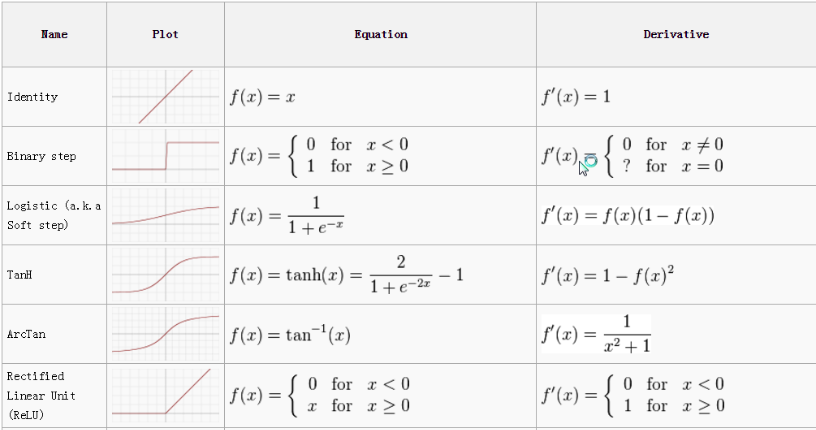

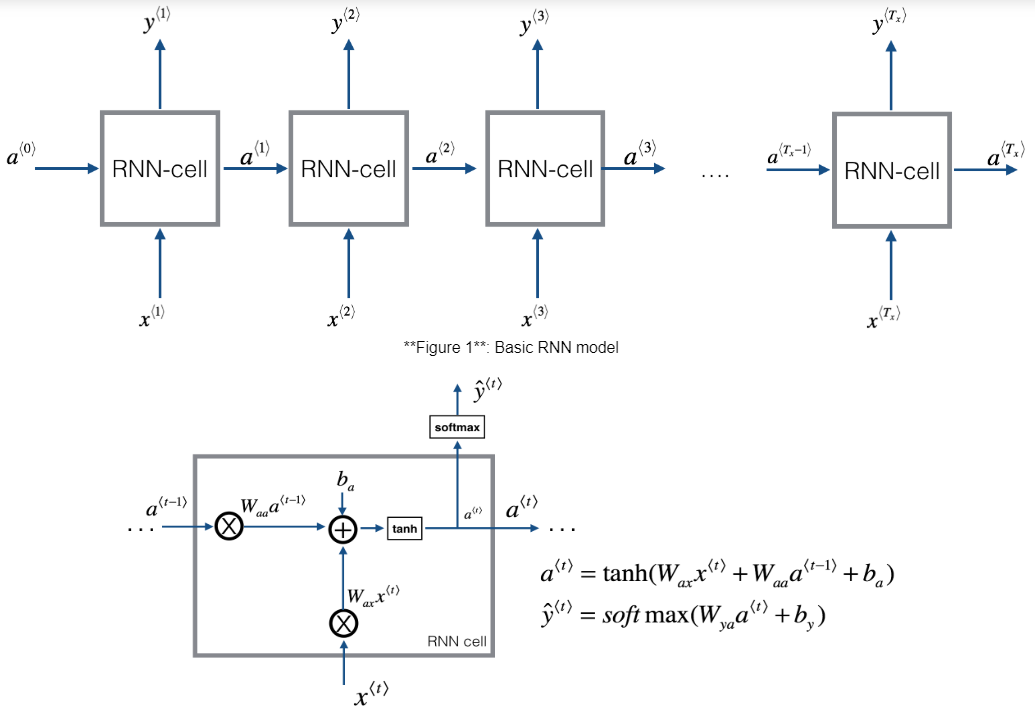

# 순환신경망 코드와 실험
<p>


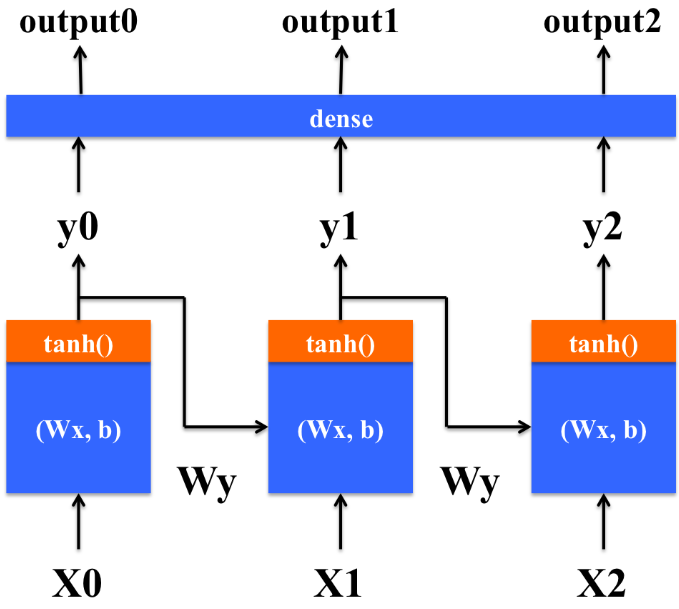

In [14]:
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

#from keras import backend as K

import numpy as np


# 계산 그래프를 리셋해서 청소한다.
#################################


X_data = np.array([
        [[1, 2], [7, 8], [13, 14]],  # 첫번째 행렬 : first batch
        [[3, 4], [9, 10], [15, 16]], # 두번째 행렬 : second batch
        [[5, 6], [11, 12], [17, 18]] # 세번째 행렬 : third batch
])      # shape: [batch_size, n_steps, n_inputs]

print( 'X_data : ', X_data.shape ) 
# X_data :  (3, 3, 2)




batch_size = 3    #X_data.shape[0]
n_steps = 3       #X_data.shape[1]
n_inputs = 2      # X_data.shape[2]
n_neurons = 3



X_data :  (3, 3, 2)


In [23]:

########################
tf.reset_default_graph()
########################


# build a sequence to sequence rnn model
X0 = tf.placeholder(tf.float32, [None, n_inputs]) # shape = [batch_size, n_inputs]
X1 = tf.placeholder(tf.float32, [None, n_inputs])
X2 = tf.placeholder(tf.float32, [None, n_inputs])

Wx = tf.Variable(tf.random_normal([n_inputs, n_neurons]))
b = tf.Variable(tf.zeros([1, n_neurons]))
Wy = tf.Variable(tf.random_normal([n_neurons, n_neurons]))

y0 = tf.tanh(tf.matmul(X0, Wx) + b) # shape: [batch_size, n_neurons]

y1 = tf.tanh(tf.matmul(y0, Wy) + tf.matmul(X1, Wx) + b)

y2 = tf.tanh(tf.matmul(y1, Wy) + tf.matmul(X2, Wx) + b) 


output0 = tf.layers.dense(y0, 1) # shape: [batch_size, 1]
output1 = tf.layers.dense(y1, 1)
output2 = tf.layers.dense(y2, 1)


# initialize the variables
init = tf.global_variables_initializer()


# train
with tf.Session() as sess:
    sess.run(init)
    run_0 = sess.run(output0, feed_dict={X0: X_data[:][0], X1: X_data[:][1], X2:X_data[:][2]})
    print(  run_0   )
    run_1 = sess.run(output1, feed_dict={X0: X_data[:][0], X1: X_data[:][1], X2:X_data[:][2]})
    print( sess.run(Wx)  )
    run_2 = sess.run(output2, feed_dict={X0: X_data[:][0], X1: X_data[:][1], X2:X_data[:][2]})
    print( sess.run(Wy)  )
    
    print('input0: {} input1: {} input2: {} -> output0: {} output1: {} output2: {}'.format(
        X_data[0][0], X_data[0][1], X_data[0][2], run_0[0], run_1[0], run_2[0]))
    print('input0: {} input1: {} input2: {} -> output0: {} output1: {} output2: {}'.format(
        X_data[1][0], X_data[1][1], X_data[1][2], run_0[1], run_1[1], run_2[1]))
    print('input0: {} input1: {} input2: {} -> output0: {} output1: {} output2: {}'.format(
        X_data[2][0], X_data[2][1], X_data[2][2], run_0[2], run_1[2], run_2[2]))
    
    
#K.clear_session()

[[1.928026 ]
 [2.0789886]
 [2.0789938]]
[[ 0.13967754  1.7457241  -0.1534974 ]
 [ 0.6815177  -0.2857581  -1.0756372 ]]
[[ 0.49562293  0.6653461   1.399634  ]
 [ 0.30740422 -1.3783448  -0.82714194]
 [ 0.5728091   0.5954439   2.0173764 ]]
input0: [1 2] input1: [7 8] input2: [13 14] -> output0: [1.928026] output1: [-0.64487493] output2: [-1.1100725]
input0: [3 4] input1: [ 9 10] input2: [15 16] -> output0: [2.0789886] output1: [-0.6485071] output2: [-1.1101567]
input0: [5 6] input1: [11 12] input2: [17 18] -> output0: [2.0789938] output1: [-0.6485071] output2: [-1.1101567]


# 새로운 버젼

In [26]:
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

#from keras import backend as K

import numpy as np


# 계산 그래프를 리셋해서 청소한다.
#################################


X_data = np.array([
        [[1, 2], [7, 8], [13, 14]],  # 첫번째 행렬 : first batch
        [[3, 4], [9, 10], [15, 16]], # 두번째 행렬 : second batch
        [[5, 6], [11, 12], [17, 18]] # 세번째 행렬 : third batch
])      # shape: [batch_size, n_steps, n_inputs]

print( 'X_data : ', X_data.shape ) 
# X_data :  (3, 3, 2)




batch_size = 3    #X_data.shape[0]
n_steps = 3       #X_data.shape[1]
n_inputs = 2      # X_data.shape[2]
n_neurons = 3




########################
tf.reset_default_graph()
########################


X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)

output, state = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)



print( cell )
print( X )
print( 'total outputs : ', output   )
print( '마지막 output : ', state  )



init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    feed_dict = { X: X_data }

    output_shape = sess.run( output , feed_dict=feed_dict )
    state_shape = sess.run(  state , feed_dict=feed_dict )

    print('output shape [batch_size, n_steps, n_neurons]: ', output_shape)
    print('state shape [batch_size, n_neurons]: ', state_shape)

    output_shape = sess.run( output , feed_dict=feed_dict)
    state_shape = sess.run(  state  , feed_dict=feed_dict)

    print('output shape [batch_size, n_steps, n_neurons]: ', output_shape)
    print('state shape [batch_size, n_neurons]: ', state_shape)


    output_shape = sess.run( output , feed_dict=feed_dict)
    state_shape = sess.run(  state  , feed_dict=feed_dict)

    print('output shape [batch_size, n_steps, n_neurons]: ', output_shape)
    print('state shape [batch_size, n_neurons]: ', state_shape)


    output_shape = sess.run(tf.shape(output), feed_dict=feed_dict)
    state_shape = sess.run(tf.shape(state), feed_dict=feed_dict)
    
    print('output shape [batch_size, n_steps, n_neurons]: ', output_shape)
    print('state shape [batch_size, n_neurons]: ', state_shape)

    
# K.clear_session()

X_data :  (3, 3, 2)
Tensor("Placeholder:0", shape=(None, 3, 2), dtype=float32)
total outputs :  Tensor("rnn/transpose_1:0", shape=(None, 3, 3), dtype=float32)
마지막 output :  Tensor("rnn/while/Identity_4:0", shape=(None, 3), dtype=float32)
output shape [batch_size, n_steps, n_neurons]:  [[[-0.67000353 -0.77453095  0.25697976]
  [-0.9190345  -0.99950296  0.994545  ]
  [-0.8895186  -0.9999979   0.9999907 ]]

 [[-0.6582207  -0.96810114  0.82693374]
  [-0.86754745 -0.9999002   0.9995783 ]
  [-0.8746195  -0.9999999   0.9999986 ]]

 [[-0.6461064  -0.99587345  0.9700916 ]
  [-0.8405405  -0.9999856   0.9999444 ]
  [-0.86386806 -0.99999994  0.9999998 ]]]
state shape [batch_size, n_neurons]:  [[-0.8895186  -0.9999979   0.9999907 ]
 [-0.8746195  -0.9999999   0.9999986 ]
 [-0.86386806 -0.99999994  0.9999998 ]]
output shape [batch_size, n_steps, n_neurons]:  [[[-0.67000353 -0.77453095  0.25697976]
  [-0.9190345  -0.99950296  0.994545  ]
  [-0.8895186  -0.9999979   0.9999907 ]]

 [[-0.6582207  -0.9681

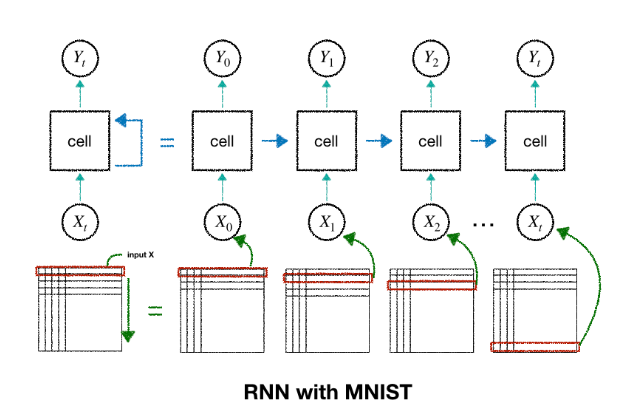

## 텐서플로우 내장 Keras 에서의 수열의 패턴 코딩

<p>
    
# import numpy : 파이썬 데이터 명령 연습

In [3]:
# 3차원 array 는 행렬들의 sequence 로 이해


import numpy as np

X = np.array( [ [ [1,2], [3,4], [4,5] ], [ [11,12],[13,14], [15,16] ] ]  )
# reshape from [batch samples, timesteps] into [batch samples, timesteps, features]

print(X[0])
print(X[0][0])
print(X[0][0][0])



Y = np.zeros( (2,1,3) )
Z = np.ones( (2,3) )
print('===\n', Z)
print('=== \n', Y)

data=[1,2,3,4,5,6]

print(  np.array(data).reshape(2,3)   )
data.append(7)
data.append([8,9])
            
print(  '*** \n', np.array(data).reshape(2,4)   )
# print(  np.array(data).reshape(2,3)   )
# ValueError: cannot reshape array of size 8 into shape (2,3)


from sklearn.utils import shuffle

y = np.array([[1., 0.], [2., 1.], [0., 0.]])
z = np.array([0, 1, 2])
a,b= shuffle( y,z)
print('shuffle == \n', a)
print('절편 == \n', b)


milk=2
vector = ['bread', milk, 3]

for item in enumerate(vector):
  print(item)

"""
Given two lists of the same length, shuffling two NumPy arrays 
reorders the elements in each array in the same manner. 
For example, shuffling [[1, 1], [2, 2], [3, 3]] and [1, 2, 3] 
in unison may result in [[2, 2], [3, 3], [1,1]] and [2, 3, 1].
"""


[[1 2]
 [3 4]
 [4 5]]
[1 2]
1
===
 [[1. 1. 1.]
 [1. 1. 1.]]
=== 
 [[[0. 0. 0.]]

 [[0. 0. 0.]]]
[[1 2 3]
 [4 5 6]]
*** 
 [[1 2 3 4]
 [5 6 7 list([8, 9])]]
shuffle == 
 [[0. 0.]
 [1. 0.]
 [2. 1.]]
절편 == 
 [2 0 1]
(0, 'bread')
(1, 2)
(2, 3)


'\nGiven two lists of the same length, shuffling two NumPy arrays \nreorders the elements in each array in the same manner. \nFor example, shuffling [[1, 1], [2, 2], [3, 3]] and [1, 2, 3] \nin unison may result in [[2, 2], [3, 3], [1,1]] and [2, 3, 1].\n'

## (연습문제) 수열의 패턴 인식 : 어떤 실행 결과가 나올지를 설명하여라
<p>

# from tensorflow import keras

In [4]:
#import tensorflow as tf

from tensorflow import keras

#from keras.models import Sequential
#from keras.layers import LSTM
#from keras.layers import Dense

from numpy import array


X = array( [
 [10, 20, 30],
 [20, 30, 40],
 [30, 40, 50],
 [40, 50, 60],
 [50, 60, 70],
 [60, 70, 80]
] )

Y = array( [40, 50, 60, 70, 80, 90] )


# reshape from [batch samples, timesteps] into [batch samples, timesteps, features]
n_features = 1
n_steps=3

X = X.reshape((X.shape[0], X.shape[1], n_features))
print( X[0], ' ==> ', Y[0] )
print( X , X[0][0], X[0][2][0] )

# define model
model = keras.Sequential()
model.add( keras.layers.LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add( keras.layers.Dense(1) )
model.compile( optimizer=keras.optimizers.Adam(0.01),  loss='mean_squared_error')

# fit model
model.fit(X, Y, epochs=200, verbose=0)

# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=1)

print(yhat)

x_input = array([15, 25, 35])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=1)

print(yhat)

[[10]
 [20]
 [30]]  ==>  40
[[[10]
  [20]
  [30]]

 [[20]
  [30]
  [40]]

 [[30]
  [40]
  [50]]

 [[40]
  [50]
  [60]]

 [[50]
  [60]
  [70]]

 [[60]
  [70]
  [80]]] [10] 30
1/1 [==============================] - 0s 131ms/sample
[[100.534615]]
1/1 [==============================] - 0s 2ms/sample
[[45.333813]]


# 위의 코드는 10,20,30,40,50,60,70,80,90 수열을 학습시키고 예측

# 다음 텐서플로우 코드의 실행을 설명하여라

In [5]:
import tensorflow.compat.v1 as tf
import numpy as np

tf.disable_eager_execution()

n_inputs = 4
n_neurons = 6
n_timesteps = 2
# The data is a sequence of a number from 0 to 9 and 
# divided into three 3 batches of data.

X_batch = np.array([
        [[0, 1, 2, 5], [9, 8, 7, 4]], # 첫번째 행렬 : Batch 1
        [[3, 4, 5, 2], [0, 0, 0, 0]], # Batch 2
        [[6, 7, 8, 5], [6, 5, 4, 2]], # Batch 3
    ])


In [6]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, n_timesteps, n_inputs])

basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

print( outputs )
print( states )
print( outputs.dtype )

saver = tf.train.Saver()
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X: X_batch})
    print(states.eval(feed_dict={X: X_batch}))
    print( '=========' )
    print(outputs_val)   
    print( '=========' )
    print(outputs_val.shape)    
    #saver.save( sess, 'data_out/rnntest')

Tensor("rnn/transpose_1:0", shape=(None, 2, 6), dtype=float32)
Tensor("rnn/while/Identity_4:0", shape=(None, 6), dtype=float32)
<dtype: 'float32'>
[[-0.9996219   0.67509454  0.9582475  -0.99999267 -0.9999999  -0.99998784]
 [ 0.82567525  0.745385    0.5050277   0.29396266  0.48296615  0.6996415 ]
 [-0.96509844  0.88898325  0.85535365 -0.9974723  -0.99975896 -0.99857783]]
[[[-0.95283085  0.97191864  0.49410665 -0.78442913 -0.99598926
    0.9353783 ]
  [-0.9996219   0.67509454  0.9582475  -0.99999267 -0.9999999
   -0.99998784]]

 [[-0.99814606  0.72169155 -0.749105   -0.993439   -0.9994494
   -0.956755  ]
  [ 0.82567525  0.745385    0.5050277   0.29396266  0.48296615
    0.6996415 ]]

 [[-0.9999881   0.96490747 -0.49827567 -0.9999439  -0.9999998
   -0.9980313 ]
  [-0.96509844  0.88898325  0.85535365 -0.9974723  -0.99975896
   -0.99857783]]]
(3, 2, 6)


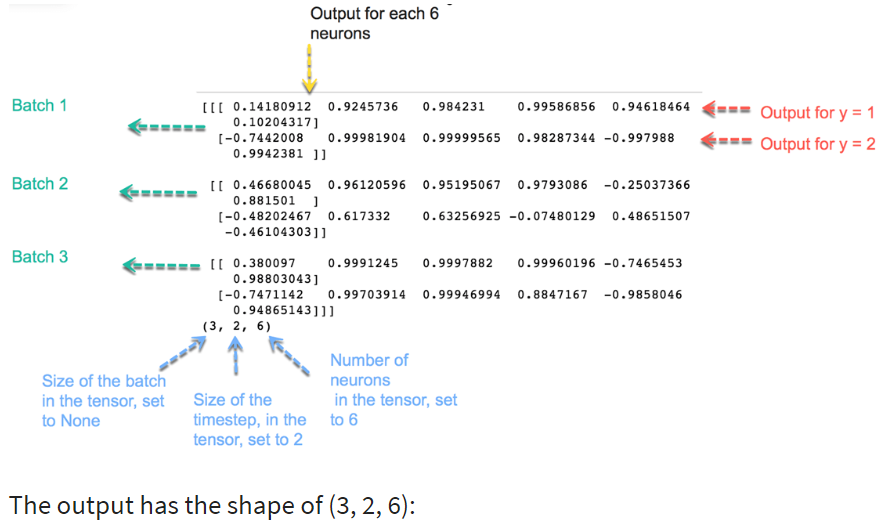

# +++++++++++++++++++++++++++++++

<p>

### (선형대수 문제) 행렬 A에 대해서,  ((v*W)W)W ... = vW^k 값은
### 수렴 또는 발산할 수 있다 (작으면 0으로 수렴). 그이유는 무엇?

<p>
    
### (AI 극복방안) 따라서, 위와 같은 단순한 RNN 는 문제가 있다   
### 이를 극복하려고 LSTM 나오고,  조경현등이 GRU 도입하였다.
    
<p>

https://ratsgo.github.io/natural%20language%20processing/2017/03/09/rnnlstm/
    
<p>
    
# 바로 아래의 코드는 참고 ( Computaiton Graph 텐서보드)

In [1]:


import tensorflow.compat.v1  as tf
tf.disable_eager_execution()



a = tf.constant(3.0, name='a')
b = tf.constant(5.0, name='b')
c = a * b

with tf.Session() as sess:
    writer = tf.summary.FileWriter("./data_out/logs/", sess.graph)
    sess.run(c)
    writer.close()
    
    


In [2]:
!dir .\data_out\logs

 C 드라이브의 볼륨: TurBOOKi
 볼륨 일련 번호: F4B3-EA7C

 C:\WinPython37F\notebooks\TF-Keras_TEACHER\data_out\logs 디렉터리

20-03-29  오후 05:02    <DIR>          .
20-03-29  오후 05:02    <DIR>          ..
20-03-24  오전 11:47               657 events.out.tfevents.1585018034.HANHYUKCHO
20-03-24  오전 11:51               657 events.out.tfevents.1585018276.HANHYUKCHO
20-03-24  오전 11:55             1,067 events.out.tfevents.1585018511.HANHYUKCHO
20-03-24  오전 11:55             1,477 events.out.tfevents.1585018531.HANHYUKCHO
20-03-24  오전 11:56               657 events.out.tfevents.1585018605.HANHYUKCHO
20-03-24  오전 11:57             1,067 events.out.tfevents.1585018622.HANHYUKCHO
20-03-24  오전 11:59               657 events.out.tfevents.1585018791.HANHYUKCHO
20-03-24  오후 12:02            21,927 events.out.tfevents.1585018951.HANHYUKCHO
20-03-29  오후 04:47            39,857 events.out.tfevents.1585468074.HANHYUKCHO
20-03-29  오후 05:02               661 events.out.tfevents.1585468934.HANHYUKCHO
              10개 파일   

## 바로 아래를 먼저 실행시키고, 바로 아래의 주소를 클릭 !!¶

<p>
    
## 템서보드 실행 (error 많음) : !tensorboard --logdir=./data_out/logs/
<p>
    
## 여기 주소를 클릭 : http://localhost:6006

# +++++++++++++++++++++++++++++++

<p> &nbsp;
    
<p> &nbsp;
    
# +++++++++++++++++++++++++++++++

    
    

# [목표] 고등학교 점화수열과 순환신경망 !!

# [탐구] 삼각함수 그래프 학습과 예측 탐구!!

<p>
&nbsp;
    
    
# (코드 one : 1) 텐서플로우 1.* 코드

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
epoch: 0  validation loss: 0.37936264
epoch: 1  validation loss: 0.26572236
epoch: 2  validation loss: 0.1896647
epoch: 3  validation loss: 0.11480025
epoch: 4  validation loss: 0.05284787
epoch: 5  validation loss: 0.026149184
epoch: 6  validation loss: 0.024994172
epoch: 7  validation loss: 0.011745961
epoch: 8  validation loss: 0.0073640165
epoch: 9  validation loss: 0.0050869677
epoch: 10  validation loss: 0.008022867
epoch: 11  validation loss: 0.005256756
epoch: 12  validation loss: 0.0031540664
epoch: 13  validation loss: 0.0025036868
epoch: 14  validation loss: 0.0014746484
epoch: 15  validation loss: 0.001293127
epoch: 16  validation loss: 0.0012995657
epoch: 17  validation loss: 0.001825331
epoch: 18  validation loss: 0.0014363895
epoch: 19  validation loss: 0.001383766
epoch: 20  validation loss: 0.0013255428
epoch: 21  validation loss: 0.0017173
e

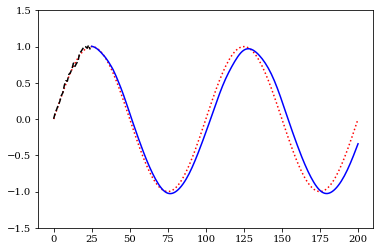

In [27]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle




#####################################

np.random.seed(0)
tf.set_random_seed(1234)

#####################################



# 1 : tf.nn.rnn_cell.BasicRNNCell
def inferenceRNN(x, n_batch, maxlen=None, n_hidden=None, n_out=None):
    def weight_variable(shape):
        initial = tf.truncated_normal(shape, stddev=0.01)
        return tf.Variable(initial)

    def bias_variable(shape):
        initial = tf.zeros(shape, dtype=tf.float32)
        return tf.Variable(initial)

    cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden)
    initial_state = cell.zero_state(n_batch, tf.float32)

    state = initial_state
    outputs = []  # 과거의 은닉층에서 나온 출력을 저장한다
    with tf.variable_scope('RNN'):
        for t in range(maxlen):
            if t > 0:
                tf.get_variable_scope().reuse_variables()
            (cell_output, state) = cell(x[:, t, :], state)
            outputs.append(cell_output)

    output = outputs[-1]

    V = weight_variable([n_hidden, n_out])
    c = bias_variable([n_out])
    y = tf.matmul(output, V) + c  # 선형활성

    return y


# 2 : tf.nn.rnn_cell.BasicLSTMCell
def inferenceBasicLSTM(x, n_batch, maxlen=None, n_hidden=None, n_out=None):
    def weight_variable(shape):
        initial = tf.truncated_normal(shape, stddev=0.01)
        return tf.Variable(initial)

    def bias_variable(shape):
        initial = tf.zeros(shape, dtype=tf.float32)
        return tf.Variable(initial)

    cell = tf.nn.rnn_cell.BasicLSTMCell(n_hidden, forget_bias=1.0)
    initial_state = cell.zero_state(n_batch, tf.float32)

    state = initial_state
    outputs = []  # 과거의 은닉층에서 나온 출력을 저장한다
    with tf.variable_scope('LSTM'):
        for t in range(maxlen):
            if t > 0:
                tf.get_variable_scope().reuse_variables()
            (cell_output, state) = cell(x[:, t, :], state)
            outputs.append(cell_output)

    output = outputs[-1]

    V = weight_variable([n_hidden, n_out])
    c = bias_variable([n_out])
    y = tf.matmul(output, V) + c  # 선형활성

    return y



# 3 : tf.nn.rnn_cell.LSTMCell
def inferenceLSTM(x, n_batch, maxlen=None, n_hidden=None, n_out=None):
    def weight_variable(shape):
        initial = tf.truncated_normal(shape, stddev=0.01)
        return tf.Variable(initial)

    def bias_variable(shape):
        initial = tf.zeros(shape, dtype=tf.float32)
        return tf.Variable(initial)

    cell = tf.nn.rnn_cell.LSTMCell(n_hidden, forget_bias=1.0)
    initial_state = cell.zero_state(n_batch, tf.float32)

    state = initial_state
    outputs = []  # 과거의 은닉층에서 나온 출력을 저장한다
    
    with tf.variable_scope('LSTM'):
        for t in range(maxlen):
            if t > 0:
                tf.get_variable_scope().reuse_variables()
            (cell_output, state) = cell(x[:, t, :], state)
            outputs.append(cell_output)

    output = outputs[-1]

    V = weight_variable([n_hidden, n_out])
    c = bias_variable([n_out])
    y = tf.matmul(output, V) + c  # 선형활성

    return y


# 4 : tf.nn.rnn_cell.GRUCell
def inferenceGRU(x, n_batch, maxlen=None, n_hidden=None, n_out=None):
    def weight_variable(shape):
        initial = tf.truncated_normal(shape, stddev=0.01)
        return tf.Variable(initial)

    def bias_variable(shape):
        initial = tf.zeros(shape, dtype=tf.float32)
        return tf.Variable(initial)

    cell = tf.nn.rnn_cell.GRUCell(n_hidden)
    initial_state = cell.zero_state(n_batch, tf.float32)

    state = initial_state
    outputs = []  # 과거의 은닉층에서 나온 출력을 저장한다
    with tf.variable_scope('GRU'):
        for t in range(maxlen):
            if t > 0:
                tf.get_variable_scope().reuse_variables()
            (cell_output, state) = cell(x[:, t, :], state)
            outputs.append(cell_output)

    output = outputs[-1]

    V = weight_variable([n_hidden, n_out])
    c = bias_variable([n_out])
    y = tf.matmul(output, V) + c  # 선형활성

    return y




##########################################

##########################################


def loss(y, t):
    mse = tf.reduce_mean(tf.square(y - t))
    return mse


def training(loss):
    optimizer = \
        tf.train.AdamOptimizer(learning_rate=0.001, beta1=0.9, beta2=0.999)

    train_step = optimizer.minimize(loss)
    return train_step


class EarlyStopping():
    def __init__(self, patience=0, verbose=0):
        self._step = 0
        self._loss = float('inf')
        self.patience = patience
        self.verbose = verbose

    def validate(self, loss):
        if self._loss < loss:
            self._step += 1
            if self._step > self.patience:
                if self.verbose:
                    print('early stopping')
                return True
        else:
            self._step = 0
            self._loss = loss

        return False

    
    
    
    
############################    
    
    
    
    
    

if __name__ == '__main__':
    
    def sin(x, T=100):
        return np.sin(2.0 * np.pi * x / T)

    def toy_problem(T=100, ampl=0.05):
        x = np.arange(0, 2 * T + 1)
        noise = ampl * np.random.uniform(low=-1.0, high=1.0, size=len(x))
        return sin(x) + noise

    
    
    '''
    데이터를 생성한다
    '''
    
    T = 100
    f = toy_problem(T)

    length_of_sequences = 2 * T
    maxlen = 25

    data = []
    target = []

    for i in range(0, length_of_sequences - maxlen + 1):
        data.append(f[i: i + maxlen])
        target.append(f[i + maxlen])

    X = np.array(data).reshape(len(data), maxlen, 1)
    Y = np.array(target).reshape(len(data), 1)

    # 데이터 설정
    N_train = int(len(data) * 0.9)
    N_validation = len(data) - N_train

    X_train, X_validation, Y_train, Y_validation = \
        train_test_split(X, Y, test_size=N_validation)

    
    
    '''
    모델을 설정한다
    '''
    
    tf.reset_default_graph()
    
    #########################
    
    n_in = len(X[0][0])  # 1
    n_hidden = 30
    n_out = len(Y[0])  # 1

    x = tf.placeholder(tf.float32, shape=[None, maxlen, n_in])
    t = tf.placeholder(tf.float32, shape=[None, n_out])
    n_batch = tf.placeholder(tf.int32, shape=[])
    
    
    #########################################################################
    # 앞의 1,2,3,4 경우를 바꾸려면 여기의 이름을 바꾼다 
    
    y = inferenceBasicLSTM(x, n_batch, maxlen=maxlen, n_hidden=n_hidden, n_out=n_out)
    
    #########################################################################
    
    
    loss = loss(y, t)
    train_step = training(loss)

    early_stopping = EarlyStopping(patience=10, verbose=1)
    history = {
        'val_loss': []
    }

    
    
    '''
    모델을 학습한다
    '''
    
    #saver = tf.train.Saver()

    
    epochs = 500
    batch_size = 10

    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)

    n_batches = N_train // batch_size

    for epoch in range(epochs):
        X_, Y_ = shuffle(X_train, Y_train)

        for i in range(n_batches):
            start = i * batch_size
            end = start + batch_size

            sess.run(train_step, feed_dict={
                x: X_[start:end],
                t: Y_[start:end],
                n_batch: batch_size
            })

        # 검증 데이터를 사용해서 평가한다
        val_loss = loss.eval(session=sess, feed_dict={
            x: X_validation,
            t: Y_validation,
            n_batch: N_validation
        })

        history['val_loss'].append(val_loss)
        print('epoch:', epoch,
              ' validation loss:', val_loss)

        # Early Stopping 검사
        if early_stopping.validate(val_loss):
            #saver.save(sess, 'data_out/rnntest.ckpt')
            break
            
        

    '''
    출력을 사용해서 예측을 실행한다
    '''
    
    truncate = maxlen
    Z = X[:1]  # 본래 데이터의 첫머리의 일부분만 잘라낸다

    original = [f[i] for i in range(maxlen)]
    ###  맨처음의 인풋 모양
    predicted = [None for i in range(maxlen)]

    for i in range(length_of_sequences - maxlen + 1):
        # 마지막 시계열 데이터로 미래를 예측한다
        z_ = Z[-1:]
        y_ = y.eval(session=sess, feed_dict={
            x: Z[-1:],
            n_batch: 1
        })
        # 예측 결과를 사용해서 새로운 시계열 데이터를 생성한다
        sequence_ = np.concatenate(
            (z_.reshape(maxlen, n_in)[1:], y_), axis=0) \
            .reshape(1, maxlen, n_in)
        Z = np.append(Z, sequence_, axis=0)
        predicted.append(y_.reshape(-1))
        
        

    '''
    그래프로 가시화한다
    '''
    
    plt.rc('font', family='serif')
    plt.figure()
    plt.ylim([-1.5, 1.5])
    plt.plot(toy_problem(T, ampl=0), linestyle='dotted', color='red')
    plt.plot(original, linestyle='dashed', color='black')
    plt.plot(predicted, color='blue')
    plt.show()

    

# (코드 two : 2) 텐서플로우 2 코드 (내장 Keras 사용)

In [28]:
import numpy as np

import tensorflow as tf

from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline



def sin(x, T=100):
    return np.sin(2.0 * np.pi * x / T)


def toy_problem(T=100, ampl=0.05):
    x = np.arange(0, 2 * T + 1)
    noise = ampl * np.random.uniform(low=-1.0, high=1.0, size=len(x))
    return sin(x) + noise


func = toy_problem()


def make_dataset(low_data, n_prev=100):

    data, target = [], []
    maxlen = 25

    for i in range(len(low_data)-maxlen):
        data.append(low_data[i:i + maxlen])
        target.append(low_data[i + maxlen])

    re_data = np.array(data).reshape(len(data), maxlen, 1)
    re_target = np.array(target).reshape(len(data), 1)

    return re_data, re_target


X_train, y_train = make_dataset(func)

In [29]:
length_of_sequence = X_train.shape[1] 
in_out_neurons = 1
n_hidden = 300


model = keras.Sequential()
model.add(keras.layers.LSTM(
  units=128,
  input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.Dense(units=1))
model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.001)
)

# early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=20)

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=300,
    validation_split=0.1,
    verbose=1,
    shuffle=True,
    callbacks = [
    tf.keras.callbacks.EarlyStopping(verbose=True, patience=20, monitor='val_loss'),
    tf.keras.callbacks.ModelCheckpoint(filepath='data_out/rnntest/', period=20 , verbose=True)
                ]
    
    
    
)


Train on 158 samples, validate on 18 samples
Epoch 1/30
158/158 [==============================] - 1s 6ms/sample - loss: 0.4798 - val_loss: 0.1890
Epoch 2/30
158/158 [==============================] - 0s 379us/sample - loss: 0.3739 - val_loss: 0.1088
Epoch 3/30
158/158 [==============================] - 0s 360us/sample - loss: 0.2827 - val_loss: 0.0543
Epoch 4/30
158/158 [==============================] - 0s 360us/sample - loss: 0.2068 - val_loss: 0.0321
Epoch 5/30
158/158 [==============================] - 0s 347us/sample - loss: 0.1495 - val_loss: 0.0527
Epoch 6/30
158/158 [==============================] - 0s 404us/sample - loss: 0.1162 - val_loss: 0.1201
Epoch 7/30
158/158 [==============================] - 0s 335us/sample - loss: 0.1094 - val_loss: 0.1955
Epoch 8/30
158/158 [==============================] - 0s 347us/sample - loss: 0.1147 - val_loss: 0.2217
Epoch 9/30
158/158 [==============================] - 0s 360us/sample - loss: 0.1101 - val_loss: 0.1978
Epoch 10/30
158/158 [

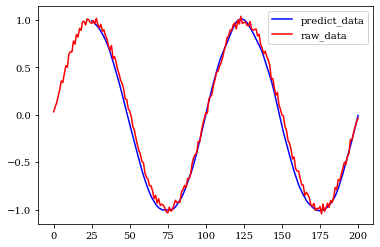

In [30]:
predicted = model.predict(X_train)

plt.figure()
plt.plot(range(25,len(predicted)+25),predicted, 
         color="b", label="predict_data")
plt.plot(range(0, len(func)), func, color="r", label="raw_data")
plt.legend()
plt.show()

# ===============================

<p> &nbsp;

# +++++++++++++++++++++++++++++++

<p> &nbsp;
    
    

# [STOP] 아래는 모두 참고자료 
    
<p> &nbsp;
    
# +++++++++++++++++++++++++++++++



# [과제] 다양한 주기 함수의 그래프로 확장 !! 

# ++++++++++++++++++++++++++++++

<p> &nbsp;

## [참고] 순환신경망 응용 (주식 time series)
<p> &nbsp;

# 코로나 ? [ 주식 가격을 예측할 수 있을까 ? ]

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Oct 19 18:42:41 2018
@author: Umesh
"""
#import all libraries
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow.compat.v1  as tf
tf.disable_eager_execution()


# import dataset 
dataset = pd.read_csv('U3.stock.csv', index_col = 0)
df_stock = dataset.copy()
df_stock = df_stock.dropna()
df_stock = df_stock[['Open', 'High', 'Low', 'Close']]

#####################################################

# data scaling (normalizing)
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['Open'] = min_max_scaler.fit_transform(df.Open.values.reshape(-1,1))
    df['High'] = min_max_scaler.fit_transform(df.High.values.reshape(-1,1))
    df['Low'] = min_max_scaler.fit_transform(df.Low.values.reshape(-1,1))
    df['Close'] = min_max_scaler.fit_transform(df['Close'].values.reshape(-1,1))
    return df
df_stock_norm = df_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)


# Splitting the dataset into Train, Valid & test data 
valid_set_size_percentage = 10 
test_set_size_percentage = 10 
seq_len = 20 # taken sequence length as 20


def load_data(stock, seq_len):
    data_raw = stock.as_matrix() 
    data = [] 
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]



x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)


#########################################################

"""Building the Model"""

# parameters & Placeholders 
n_steps = seq_len-1 
n_inputs = 4 
n_neurons = 200 
n_outputs = 4
n_layers = 2
learning_rate = 0.001
batch_size = 50
n_epochs = 20 # 100 
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_outputs])

# function to get the next batch
index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)


def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   
    start = index_in_epoch
    index_in_epoch += batch_size 
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size     
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

##############################################

#RNN 
layers = [tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
         for layer in range(n_layers)]



# LSTM  
#layers = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons, activation=tf.nn.elu)
#        for layer in range(n_layers)]




#LSTM with peephole connections
#layers = [tf.contrib.rnn.LSTMCell(num_units=n_neurons, 
#                                  activation=tf.nn.leaky_relu, use_peepholes = True)
#          for layer in range(n_layers)]




#GRU 
#layers = [tf.contrib.rnn.GRUCell(num_units=n_neurons, activation=tf.nn.leaky_relu)
#          for layer in range(n_layers)] 
   
############################################   

    
multi_layer_cell = tf.nn.rnn_cell.MultiRNNCell(layers)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)

outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence
                                              
# Cost function
loss = tf.reduce_mean(tf.square(outputs - y))

#optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) 
training_op = optimizer.minimize(loss)

                                              
# Fitting the model
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch}) 
        
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train}) 
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid}) 
            print('%.2f epochs: MSE train/valid = %.6f/%.6f'%(
                iteration*batch_size/train_set_size, mse_train, mse_valid))
            
    # Predictions
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})

    
#checking prediction output nos 
y_test_pred.shape

# ploting the graph
comp = pd.DataFrame({'Column1':y_test[:,3],'Column2':y_test_pred[:,3]})
plt.figure(figsize=(10,5))
plt.plot(comp['Column1'], color='blue', label='Target')
plt.plot(comp['Column2'], color='black', label='Prediction')
plt.legend()
plt.show()

x_train.shape =  (4497, 19, 4)
y_train.shape =  (4497, 4)
x_valid.shape =  (562, 19, 4)
y_valid.shape =  (562, 4)
x_test.shape =  (562, 19, 4)
y_test.shape =  (562, 4)
Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API


C:\WinPython37F\python-3.7.2.amd64\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
0.00 epochs: MSE train/valid = 0.936961/1.956293
4.99 epochs: MSE train/valid = 0.000075/0.000067


# ++++++++++++++++++++++++++++++++

<p> &nbsp;
    
# ++++++++++++++++++++++++++++++++

<p> &nbsp;
    

# [실험] RNN & LSTM & GRU 구조와 원리 !

In [1]:
import numpy as np
from keras.models import Model, Sequential
from keras.layers import *

Using TensorFlow backend.


## 1. SimpleRNN  (케라스는 session 없이 곧바로 실행이 됨)

Input shape of SimpleRNN should be 3D tensor => (batch_size, timesteps, input_dim)
- **batch_size**: ommitted when creating RNN instance (== None). Usually designated when fitting model.
- **timesteps**: number of input sequence per batch
- **input_dim**: dimensionality of input sequence

In [2]:
# for instance, consider below array
x = np.array([[
             [1,    # => input_dim 1
              2,    # => input_dim 2 
              3],   # => input_dim 3     # => timestep 1                            
             [4, 5, 6]                   # => timestep 2
             ],                                  # => batch 1
             [[7, 8, 9], [10, 11, 12]],          # => batch 2
             [[13, 14, 15], [16, 17, 18]]        # => batch 3
             ])

In [3]:
print('(Batch size, timesteps, input_dim) = ',x.shape)

(Batch size, timesteps, input_dim) =  (3, 2, 3)


In [4]:
# rnn = SimpleRNN(50)(Input(shape = (10,))) => error
# rnn = SimpleRNN(50)(Input(shape = (10, 30, 40))) => error
rnn = SimpleRNN(50)(Input(shape = (10, 30)))

**return_state** = **return_sequences** = **False** ====> output_shape = **(batch_size = None, num_units)**

In [5]:
rnn = SimpleRNN(50)(Input(shape = (10, 30)))
print(rnn.shape)

(None, 50)


**return_sequences = True** ====> output_shape = **(batch_size, timesteps, num_units)**

In [6]:
rnn = SimpleRNN(50, return_sequences = True)(Input(shape = (10, 30)))
print(rnn.shape)

(None, 10, 50)


return_state = True ===> outputs list of tensor: **[output, state]**
- if return_sequences == False     =>>    output_shape = (batch_size, num_units)
- if return_sequences == True      =>>    output_shape = (batch_size, timesteps, num_units)

In [7]:
rnn = SimpleRNN(50, return_sequences = False, return_state = True)(Input(shape = (10, 30)))
print(rnn[0].shape)         # shape of output
print(rnn[1].shape)         # shape of last state

(None, 50)
(None, 50)


In [8]:
rnn = SimpleRNN(50, return_sequences = True, return_state = True)(Input(shape = (10, 30)))
print(rnn[0].shape)         # shape of output
print(rnn[1].shape)         # shape of last state

(None, 10, 50)
(None, 50)


Current output and state can be unpacked as below

In [9]:
output, state = SimpleRNN(50, return_sequences = True, return_state = True)(Input(shape = (10, 30)))

In [10]:
print(output.shape)
print(state.shape)

(None, 10, 50)
(None, 50)


## 2. LSTM
- Outputs of LSTM are quite similar to those of RNNs, but there exist subtle differences
- If you compare two diagrams below, there is one more type of "state" that is preserved to next module

<br>
<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-SimpleRNN.png" style="width: 500px"/>

<center> Standard RNN </center>

<br>
<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png" style="width: 500px"/>

<center> LSTM </center>

In addition to "hidden state (ht)" in RNN, there exist "cell state (Ct)" in LSTM structure

<br>
<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-o.png" style="width: 500px"/>

<center> Hidden State </center>

<br>
<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-C.png" style="width: 500px"/>

<center> Cell State </center>

<p>
    

# (참고) Animaiton 


https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21

<p>


https://colah.github.io/posts/2015-08-Understanding-LSTMs/

In [20]:
import tensorflow.compat.v1  as tf
tf.disable_eager_execution()

import numpy as np

tf.reset_default_graph()

# Values is data batch_size=2, sequence_length = 3, num_features = 1
values = tf.constant(np.array([
    [[1], [2], [3]],
    [[2], [3], [4]]
]), dtype=tf.float32)

lstm_cell = tf.nn.rnn_cell.LSTMCell(100)

outputs, state = tf.nn.dynamic_rnn(cell=lstm_cell, dtype=tf.float32, inputs=values)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    output_run, state_run = sess.run([outputs, state])
    print( output_run[0][0][:5] )
    print( state_run[0][0][:5]  )
    print( sess.run(outputs[0][0][0:5]) )
    print( sess.run(state[0][0][0:5]) )
    print( sess.run(state[0][1][0:5]) )
    print( sess.run(state.c[0][0]) )
    print( sess.run(state.h[0][0]) )
    
    
print( outputs )
print( state.c )
print( state.h )

np.all(output_run[:,-1] == state_run.h)

[ 0.00860321  0.00397194 -0.02596533  0.01316135  0.00596004]
[ 0.11811267  0.03057668 -0.2800129   0.12821007  0.07586652]
[ 0.00860321  0.00397194 -0.02596533  0.01316135  0.00596004]
[ 0.11811267  0.03057668 -0.2800129   0.12821007  0.07586652]
[ 0.17899553  0.04016543 -0.40598625  0.1779969   0.11475746]
0.11811267
0.048835147
Tensor("rnn/transpose_1:0", shape=(2, 3, 100), dtype=float32)
Tensor("rnn/while/Identity_4:0", shape=(2, 100), dtype=float32)
Tensor("rnn/while/Identity_5:0", shape=(2, 100), dtype=float32)


True

# +++++++++++++++++++++

In [21]:
tf.reset_default_graph()

# Values is data batch_size=2, sequence_length = 3, num_features = 1
values = tf.constant(np.array([
    [[1], [2], [3]],
    [[2], [3], [4]]
]), dtype=tf.float32)

lstm_cell_fw = tf.nn.rnn_cell.LSTMCell(100)
lstm_cell_bw = tf.nn.rnn_cell.LSTMCell(105) # change to 105 just so can see the effect in output

(output_fw, output_bw), (output_state_fw, output_state_bw) = tf.nn.bidirectional_dynamic_rnn(
    cell_fw=lstm_cell_fw, 
    cell_bw=lstm_cell_bw, 
    inputs=values,
    dtype=tf.float32)

output_state_bw.c

Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell))`, which is equivalent to this API


<tf.Tensor 'bidirectional_rnn/bw/bw/while/Identity_4:0' shape=(2, 105) dtype=float32>

In [23]:

tf.reset_default_graph()

# Values is data batch_size=2, sequence_length = 3, num_features = 1
values = tf.constant(np.array([
    [[1], [2], [3]],
    [[2], [3], [4]]
]), dtype=tf.float32)

lstm_cell = lambda: tf.nn.rnn_cell.LSTMCell(100)
multi_cell = tf.nn.rnn_cell.MultiRNNCell([lstm_cell() for _ in range(3)])

outputs, state = tf.nn.dynamic_rnn(cell=multi_cell, dtype=tf.float32, inputs=values)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    output_run, state_run = sess.run([outputs, state])
    
state

(LSTMStateTuple(c=<tf.Tensor 'rnn/while/Identity_4:0' shape=(2, 100) dtype=float32>, h=<tf.Tensor 'rnn/while/Identity_5:0' shape=(2, 100) dtype=float32>),
 LSTMStateTuple(c=<tf.Tensor 'rnn/while/Identity_6:0' shape=(2, 100) dtype=float32>, h=<tf.Tensor 'rnn/while/Identity_7:0' shape=(2, 100) dtype=float32>),
 LSTMStateTuple(c=<tf.Tensor 'rnn/while/Identity_8:0' shape=(2, 100) dtype=float32>, h=<tf.Tensor 'rnn/while/Identity_9:0' shape=(2, 100) dtype=float32>))

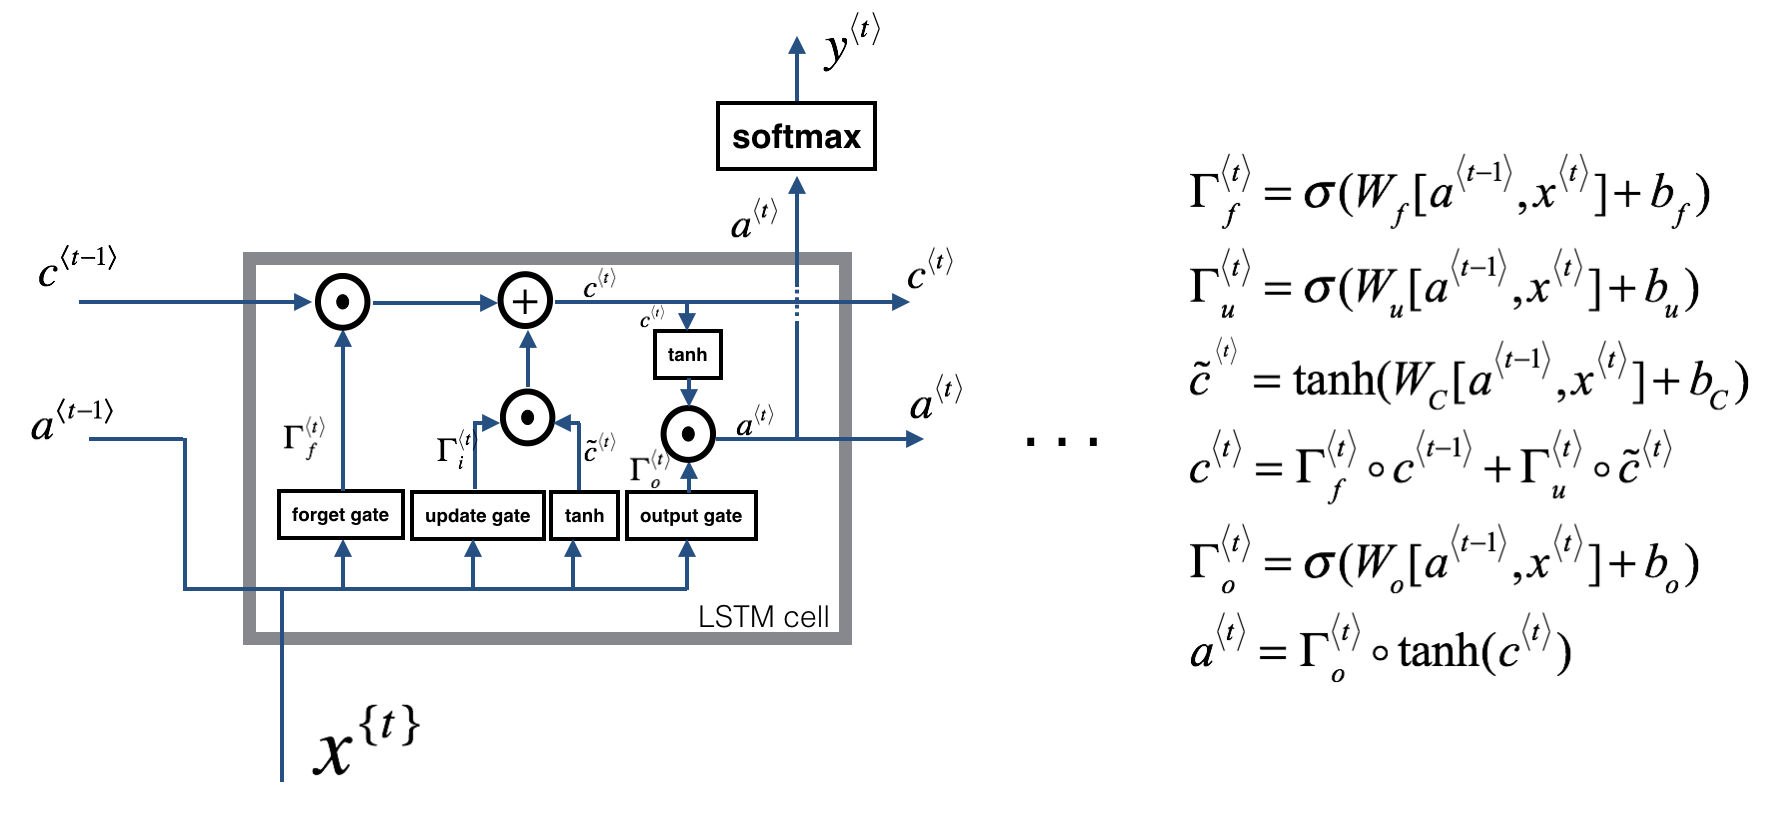

In [11]:
lstm = LSTM(32) (Input( shape=(10, 2)))

In [12]:
print( lstm)

Tensor("lstm_6/strided_slice_18:0", shape=(None, 32), dtype=float32)


In [4]:
lstm = LSTM(50)(Input(shape = (10, 30)))

In [5]:
print(lstm.shape)

(None, 50)


In [6]:
lstm = LSTM(50, return_sequences = False, return_state = True)(Input(shape = (10, 30)))
print(lstm[0].shape)         # shape of output
print(lstm[1].shape)         # shape of hidden state
print(lstm[2].shape)         # shape of cell state

(None, 50)
(None, 50)
(None, 50)


In [7]:
lstm = LSTM(50, return_sequences = True, return_state = True)(Input(shape = (10, 30)))
print(lstm[0].shape)         # shape of output
print(lstm[1].shape)         # shape of hidden state
print(lstm[2].shape)         # shape of cell state

(None, 10, 50)
(None, 50)
(None, 50)


In [8]:
output, hidden_state, cell_state = LSTM(50, return_sequences = True, return_state = True)(Input(shape = (10, 30)))

In [9]:
print(output.shape)
print(hidden_state.shape)
print(cell_state.shape)

(None, 10, 50)
(None, 50)
(None, 50)


## 3. GRU
- GRU, Popular variant of LSTM, does not have cell state
- Hence, it has only hidden state, as simple RNN

In [17]:
gru = GRU(50)(Input(shape = (10, 30)))

In [18]:
print(gru.shape)

(None, 50)


In [19]:
gru = GRU(50, return_sequences = False, return_state = True)(Input(shape = (10, 30)))
print(gru[0].shape)         # shape of output
print(gru[1].shape)         # shape of hidden state

(None, 50)
(None, 50)


In [20]:
gru = GRU(50, return_sequences = True, return_state = True)(Input(shape = (10, 30)))
print(gru[0].shape)         # shape of output
print(gru[1].shape)         # shape of hidden state

(None, 10, 50)
(None, 50)


In [21]:
output, hidden_state = GRU(50, return_sequences = True, return_state = True)(Input(shape = (10, 30)))

In [22]:
print(output.shape)
print(hidden_state.shape)

(None, 10, 50)
(None, 50)


# +++++++++++++++++++++++++++++++

<p> &nbsp;
    
# +++++++++++++++++++++++++++++++

<p> &nbsp;
    
# seq2seq 로 시작하는 두 개의 ipynb 묶음    
    
<p> &nbsp;


# 텍스트 분석 [ 앞 문장으로 뒤의 단어를 예측 ? ]

# sequence to sequence for text learning

In [3]:
'''
  code by Tae Hwan Jung(Jeff Jung) @graykode
  reference : https://github.com/golbin/TensorFlow-Tutorials/blob/master/10%20-%20RNN/03%20-%20Seq2Seq.py
'''
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
import numpy as np

tf.reset_default_graph()
# S: Symbol that shows starting of decoding input
# E: Symbol that shows starting of decoding output
# P: Symbol that will fill in blank sequence if current batch data size is short than time steps

char_arr = [c for c in 'SEPabcdefghijklmnopqrstuvwxyz']
num_dic = {n: i for i, n in enumerate(char_arr)}

seq_data = [['man', 'women'], ['black', 'white'], ['king', 'queen'], ['girl', 'boy'], ['up', 'down'], ['high', 'low']]

# Seq2Seq Parameter
n_step = 5
n_hidden = 128
n_class = len(num_dic) # number of class(=number of vocab)

def make_batch(seq_data):
    input_batch, output_batch, target_batch = [], [], []

    for seq in seq_data:
        for i in range(2):
            seq[i] = seq[i] + 'P' * (n_step - len(seq[i]))

        input = [num_dic[n] for n in seq[0]]
        output = [num_dic[n] for n in ('S' + seq[1])]
        target = [num_dic[n] for n in (seq[1] + 'E')]

        input_batch.append(np.eye(n_class)[input])
        output_batch.append(np.eye(n_class)[output])

        target_batch.append(target)

    return input_batch, output_batch, target_batch

# Model
enc_input = tf.placeholder(tf.float32, [None, None, n_class]) # [batch_size, max_len(=encoder_step), n_class]
dec_input = tf.placeholder(tf.float32, [None, None, n_class]) # [batch_size, max_len+1(=decoder_step) (becase of 'S' or 'E'), n_class]
targets = tf.placeholder(tf.int64, [None, None]) # [batch_size, max_len+1], not one-hot

with tf.variable_scope('encode'):
    enc_cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden)
    enc_cell = tf.nn.rnn_cell.DropoutWrapper(enc_cell, output_keep_prob=0.5)
    _, enc_states = tf.nn.dynamic_rnn(enc_cell, enc_input, dtype=tf.float32)
    # encoder state will go to decoder initial_state, enc_states : [batch_size, n_hidden(=128)]

with tf.variable_scope('decode'):
    dec_cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden)
    dec_cell = tf.nn.rnn_cell.DropoutWrapper(dec_cell, output_keep_prob=0.5)
    outputs, _ = tf.nn.dynamic_rnn(dec_cell, dec_input, initial_state=enc_states, dtype=tf.float32)
    # outputs : [batch_size, max_len+1, n_hidden(=128)]

model = tf.layers.dense(outputs, n_class, activation=None) # model : [batch_size, max_len+1, n_class]

cost = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=model, labels=targets))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

# Training
sess = tf.Session()
sess.run(tf.global_variables_initializer())
input_batch, output_batch, target_batch = make_batch(seq_data)

for epoch in range(5000):
    _, loss = sess.run([optimizer, cost], feed_dict={enc_input: input_batch, dec_input: output_batch, targets: target_batch})
    if (epoch + 1)%1000 == 0:
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

# Test
def translate(word):
    seq_data = [word, 'P' * len(word)]

    input_batch, output_batch, _ = make_batch([seq_data])
    prediction = tf.argmax(model, 2)

    result = sess.run(prediction, feed_dict={enc_input: input_batch, dec_input: output_batch})

    decoded = [char_arr[i] for i in result[0]]
    end = decoded.index('E')
    translated = ''.join(decoded[:end])

    return translated.replace('P','')

print('test')
print('man ->', translate('man'))
print('mans ->', translate('mans'))
print('king ->', translate('king'))
print('black ->', translate('black'))
print('upp ->', translate('upp'))

Epoch: 1000 cost = 0.001018
Epoch: 2000 cost = 0.000388
Epoch: 3000 cost = 0.000116
Epoch: 4000 cost = 0.000145
Epoch: 5000 cost = 0.000062
test
man -> women
mans -> women
king -> queen
black -> white
upp -> down


# NLP (자연어처리) &  Attention 

Epoch: 0400 cost = 0.000000
Epoch: 0800 cost = 0.000000
Epoch: 1200 cost = 0.000375
Epoch: 1600 cost = 0.000000
Epoch: 2000 cost = 0.000000
['ich', 'mochte', 'ein', 'bier', 'P'] -> ['i', 'want', 'a', 'beer', 'E']


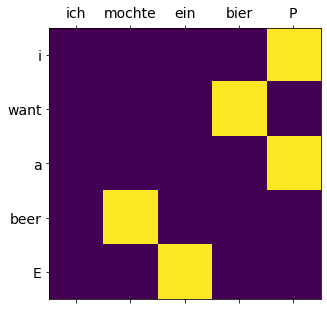

In [4]:
# code by Tae Hwan Jung(Jeff Jung) @graykode
import tensorflow.compat.v1  as tf
tf.disable_eager_execution()
import matplotlib.pyplot as plt
import numpy as np

tf.reset_default_graph()
# S: Symbol that shows starting of decoding input
# E: Symbol that shows starting of decoding output
# P: Symbol that will fill in blank sequence if current batch data size is short than time steps
sentences = ['ich mochte ein bier P', 'S i want a beer', 'i want a beer E']

word_list = " ".join(sentences).split()
word_list = list(set(word_list))
word_dict = {w: i for i, w in enumerate(word_list)}
number_dict = {i: w for i, w in enumerate(word_list)}
n_class = len(word_dict)  # vocab list

# Parameter
n_step = 5  # maxium number of words in one sentence(=number of time steps)
n_hidden = 128

def make_batch(sentences):
    input_batch = [np.eye(n_class)[[word_dict[n] for n in sentences[0].split()]]]
    output_batch = [np.eye(n_class)[[word_dict[n] for n in sentences[1].split()]]]
    target_batch = [[word_dict[n] for n in sentences[2].split()]]
    return input_batch, output_batch, target_batch

# Model
enc_inputs = tf.placeholder(tf.float32, [None, None, n_class])  # [batch_size, n_step, n_class]
dec_inputs = tf.placeholder(tf.float32, [None, None, n_class])  # [batch_size, n_step, n_class]
targets = tf.placeholder(tf.int64, [1, n_step])  # [batch_size, n_step], not one-hot

# Linear for attention
attn = tf.Variable(tf.random_normal([n_hidden, n_hidden]))
out = tf.Variable(tf.random_normal([n_hidden * 2, n_class]))

def get_att_score(dec_output, enc_output):  # enc_output [n_step, n_hidden]
    score = tf.squeeze(tf.matmul(enc_output, attn), 0)  # score : [n_hidden]
    dec_output = tf.squeeze(dec_output, [0, 1])  # dec_output : [n_hidden]
    return tf.tensordot(dec_output, score, 1)  # inner product make scalar value

def get_att_weight(dec_output, enc_outputs):
    attn_scores = []  # list of attention scalar : [n_step]
    enc_outputs = tf.transpose(enc_outputs, [1, 0, 2])  # enc_outputs : [n_step, batch_size, n_hidden]
    for i in range(n_step):
        attn_scores.append(get_att_score(dec_output, enc_outputs[i]))

    # Normalize scores to weights in range 0 to 1
    return tf.reshape(tf.nn.softmax(attn_scores), [1, 1, -1])  # [1, 1, n_step]

model = []
Attention = []
with tf.variable_scope('encode'):
    enc_cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden)
    enc_cell = tf.nn.rnn_cell.DropoutWrapper(enc_cell, output_keep_prob=0.5)
    # enc_outputs : [batch_size(=1), n_step(=decoder_step), n_hidden(=128)]
    # enc_hidden : [batch_size(=1), n_hidden(=128)]
    enc_outputs, enc_hidden = tf.nn.dynamic_rnn(enc_cell, enc_inputs, dtype=tf.float32)

with tf.variable_scope('decode'):
    dec_cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden)
    dec_cell = tf.nn.rnn_cell.DropoutWrapper(dec_cell, output_keep_prob=0.5)

    inputs = tf.transpose(dec_inputs, [1, 0, 2])
    hidden = enc_hidden
    for i in range(n_step):
        # time_major True mean inputs shape: [max_time, batch_size, ...]
        dec_output, hidden = tf.nn.dynamic_rnn(dec_cell, tf.expand_dims(inputs[i], 1),
                                               initial_state=hidden, dtype=tf.float32, time_major=True)
        attn_weights = get_att_weight(dec_output, enc_outputs)  # attn_weights : [1, 1, n_step]
        Attention.append(tf.squeeze(attn_weights))

        # matrix-matrix product of matrices [1, 1, n_step] x [1, n_step, n_hidden] = [1, 1, n_hidden]
        context = tf.matmul(attn_weights, enc_outputs)
        dec_output = tf.squeeze(dec_output, 0)  # [1, n_step]
        context = tf.squeeze(context, 1)  # [1, n_hidden]

        model.append(tf.matmul(tf.concat((dec_output, context), 1), out))  # [n_step, batch_size(=1), n_class]

trained_attn = tf.stack([Attention[0], Attention[1], Attention[2], Attention[3], Attention[4]], 0)  # to show attention matrix
model = tf.transpose(model, [1, 0, 2])  # model : [n_step, n_class]
prediction = tf.argmax(model, 2)
cost = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=model, labels=targets))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

# Training and Test
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for epoch in range(2000):
        input_batch, output_batch, target_batch = make_batch(sentences)
        _, loss, attention = sess.run([optimizer, cost, trained_attn],
                                      feed_dict={enc_inputs: input_batch, dec_inputs: output_batch, targets: target_batch})

        if (epoch + 1) % 400 == 0:
            print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

    predict_batch = [np.eye(n_class)[[word_dict[n] for n in 'P P P P P'.split()]]]
    result = sess.run(prediction, feed_dict={enc_inputs: input_batch, dec_inputs: predict_batch})
    print(sentences[0].split(), '->', [number_dict[n] for n in result[0]])

    # Show Attention
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')
    ax.set_xticklabels([''] + sentences[0].split(), fontdict={'fontsize': 14})
    ax.set_yticklabels([''] + sentences[2].split(), fontdict={'fontsize': 14})
    plt.show()